Descriptive Statistics:
            value1       value2
count  1000.000000  1000.000000
mean    101.845318    49.841751
std      19.062300     8.057225
min      51.380990   -90.585365
25%      90.619665    46.893510
50%     100.700629    50.231679
75%     110.291555    53.599052
max     246.878507    65.965538

Skewness:
 value1    2.278767
value2   -7.804778
dtype: float64

Kurtosis:
 value1     12.859692
value2    113.359491
dtype: float64

Outliers in 'value1':
         value1     value2
0    166.241086   1.797979
50   192.774066  46.872186
74    60.703823  54.981334
100  160.379004   8.321308
150  184.601924  45.043038
179  140.802537  44.482053
209  157.790972  58.747884
250  210.664685  51.654401
262   51.380990  52.693780
300  200.060274 -39.264612
350  159.145568  44.149435
400  232.962283 -90.585365
450  246.878507  51.544165
478  146.183212  45.562539
550  161.863761  49.499230
600  161.542883  54.015335
646   59.546700  49.064279
650  153.004845  52.898166
668   60.235453  5

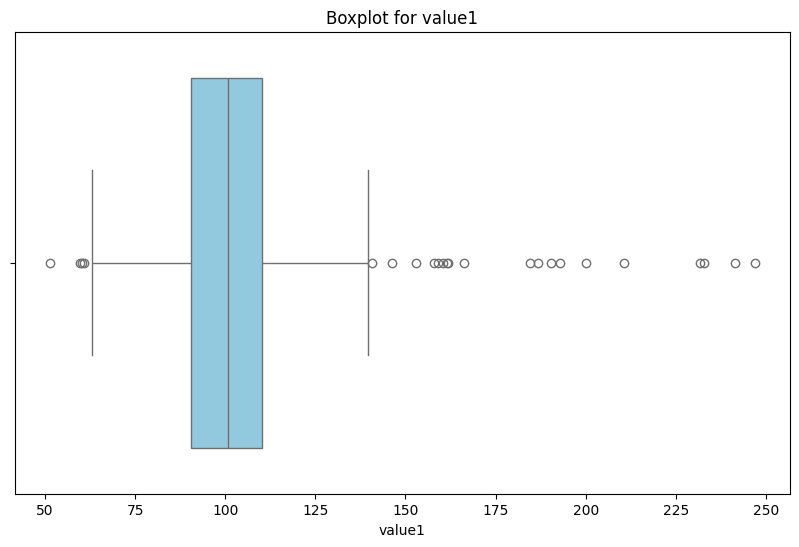

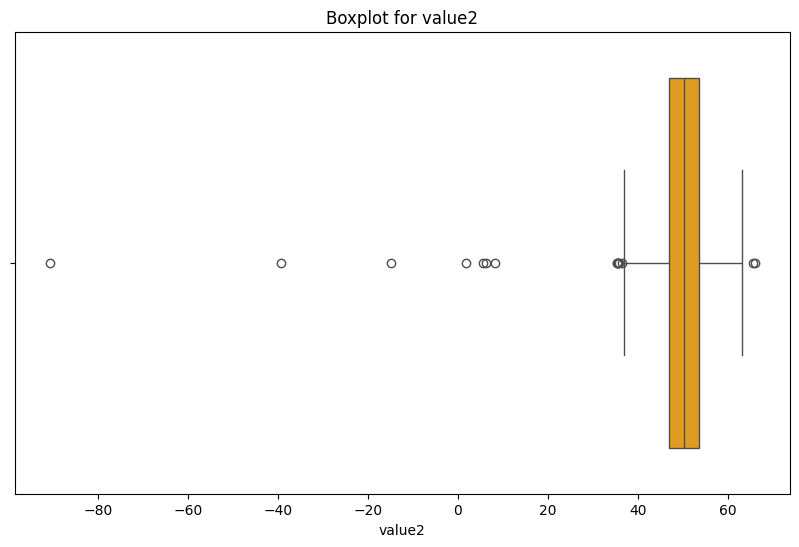

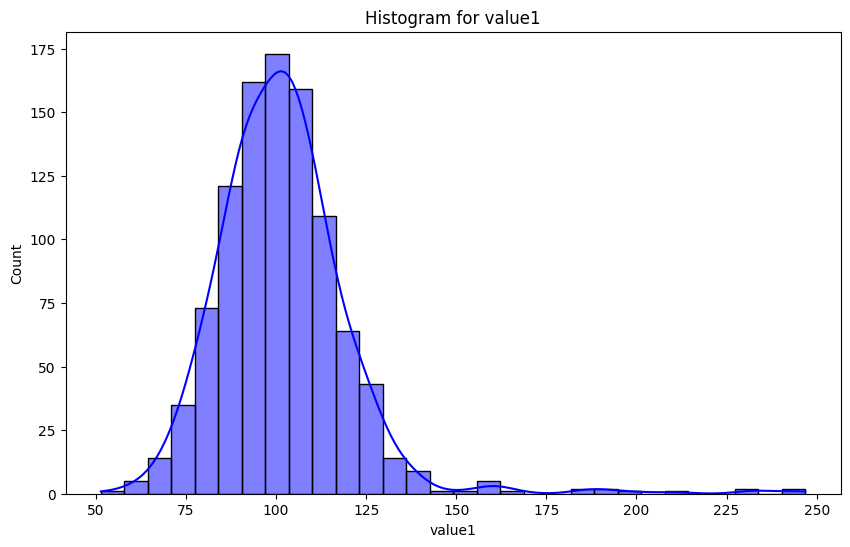

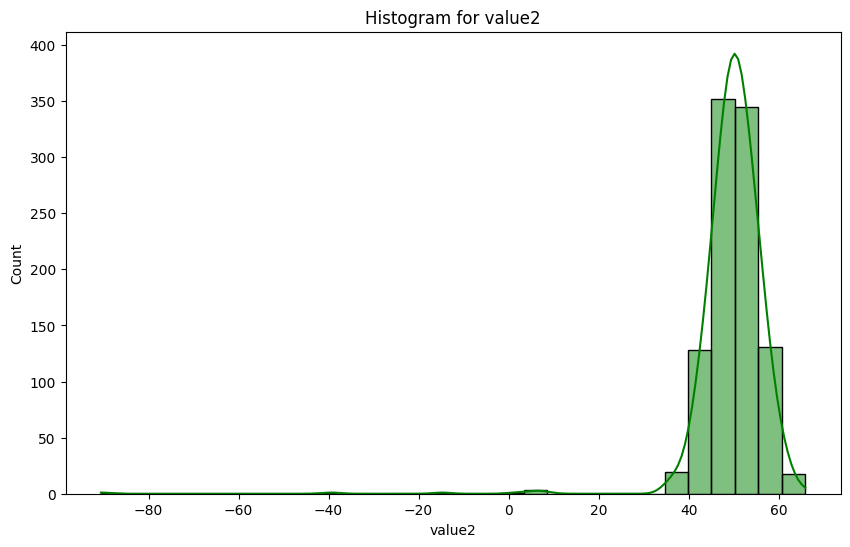

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Simulating a DataFrame with some numeric columns
np.random.seed(42)

# Simulated data
data = {
    'value1': np.random.normal(loc=100, scale=15, size=1000),
    'value2': np.random.normal(loc=50, scale=5, size=1000)
}
df = pd.DataFrame(data)

# Add some outliers
df.loc[::50, 'value1'] = np.random.normal(loc=200, scale=50, size=len(df[::50]))  # Outliers for value1
df.loc[::100, 'value2'] = np.random.normal(loc=0, scale=30, size=len(df[::100]))  # Outliers for value2

# Profiling: Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Calculate Skewness and Kurtosis
skewness = df.skew()
kurtosis = df.kurtosis()
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

# Outlier Detection using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in both columns
outliers_value1 = detect_outliers_iqr(df, 'value1')
outliers_value2 = detect_outliers_iqr(df, 'value2')

print("\nOutliers in 'value1':")
print(outliers_value1)
print("\nOutliers in 'value2':")
print(outliers_value2)

# Outlier Detection using Z-scores
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

# Detect outliers using Z-score
outliers_z_value1 = detect_outliers_zscore(df, 'value1')
outliers_z_value2 = detect_outliers_zscore(df, 'value2')

print("\nOutliers in 'value1' using Z-score:")
print(outliers_z_value1)
print("\nOutliers in 'value2' using Z-score:")
print(outliers_z_value2)

# Visualization of Outliers

# Boxplot for value1
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['value1'], color='skyblue')
plt.title('Boxplot for value1')
plt.show()

# Boxplot for value2
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['value2'], color='orange')
plt.title('Boxplot for value2')
plt.show()

# Histogram for value1
plt.figure(figsize=(10, 6))
sns.histplot(df['value1'], kde=True, color='blue', bins=30)
plt.title('Histogram for value1')
plt.show()

# Histogram for value2
plt.figure(figsize=(10, 6))
sns.histplot(df['value2'], kde=True, color='green', bins=30)
plt.title('Histogram for value2')
plt.show()